> {sub-ref}`today` | {sub-ref}`wordcount-minutes` min read

::::{figure} ../../figuras/logos/Logo_TalentQ_Azul.png
:width: 150px
:align: right
::::


# Funciones y oráculos 




$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\i}{{\color{blue} i}} $ 
$ \newcommand{\Hil}{{\mathbb H}} $
$ \newcommand{\cg}[1]{{\rm C}#1} $

In [1]:
%run ../../macro_tQ.py
import sys
sys.path.append('../../')
import macro_tQ as tQ

## Computación clásica universal 

En computación clásica, la únidad de información es el bit, una variable entera $x = 0,1 \in {\mathbb Z}_2$. Las puertas lógicas elementales son, 

- sobre un bit, la puerta NOT $x\to \neq x = x\oplus 1$, 

- sobre dos bits las puertas AND, OR, XOR, y NAND 

$$
\begin{array}{|c|c|c|c|c|}
\hline x,y & \hbox{AND} ~ (x\land y)  & \hbox{OR} ~  (x \lor y) & \hbox{XOR} ~ (x\oplus y) & \hbox{NAND} ~ \neg(x\land y)\\
\hline 00 & 0 &  0 &   0 & 1 \\
\hline 01 & 0 &  1 &  1 & 1\\
\hline 10 & 0 &  1 &  1 & 1\\
\hline 11 & 1 &  1 &  0 & 0 \\
\hline 
\end{array}
$$




::::::{card} 
<b>Teorema</b>: </i>Computación clásica universal</i> 

^^^

    
Cualquier función

$$
f : \{0,1\}^n \to \{0,1\}^m
$$

puede construirse mediante una concatenación de puertas elementales NOT, AND, OR y XOR.
::::::




Surge la cuestión acerca de si la computación cuántica podrá contendrá la clásica actuando sobre simples cúbits $\{\ket{0},\ket{1}\}$ (sin superposiciones)

Por ejemplo: la puerta clásica NOT es idéntica a las puerta cuántica X

$$
X\ket{x} \to \ket{\neg x}
$$


 

Con respecto a las operaciones sobre *dos bits*, nos encontramos con una
dificultad: 

- las puertas cuánticas son unitarias y, por tanto, reversibles. 

- pero las puertas clásicas son funciones del espacio de 2 bits a 1 bit. Por esta razón, *ninguna de estas operaciones es invertible*

Sin embargo si mantenemos memoria del primer registro, $x$ la función XOR se vuelve invertible


$$ \hbox{XOR} : ( 00,01,10,11) \to  (00, 01, 11, 10 )$$

No así las demás, que necesitan incluir un bit extra (auxiliar).  Este formalismo, denominando, *computación clásica reversible* es una rama de la computación clásica.  


::::::{card} 
<b>Teorema</b>:  

^^^
Todas las puertas lógicas clásicas  NOT, AND, OR, XOR  y   NAND admiten una implementación en un circuito cuántico en términos de  la puerta de Toffoli (CCNOT)
::::::


- La implementación de $\hbox{NOT}$


$$
\hbox{NOT}   ~\to~  {\rm CCNOT} \ket{1,1,x} = \ket{1,1,\neg x }
$$


$\rule{7mm}{0mm}$es inmediata porque ${\rm CCNOT}$ aplicado a $\ket{1,1,x}$ necesariamente actúa como $X$ en el tercer bit. 

-  La implementación de $\hbox{AND}$ 


$$  
\hbox{AND}  ~\to~ {\rm CCNOT} \ket{x,y,0} = \ket{x,y, x  \land y} 
$$


$\rule{7mm}{0mm}$es directamente la acción de la puerta $\hbox{CCNOT}$

- La implementación de $\hbox{OR}$ se basa en el *teorema de Morgan*:
$
x\lor y = \neg(\neg x\land \neg y)\, .
$ De esta manera



$$
{\rm OR} ~\to~  (X\otimes X\otimes X)\, {\rm CCNOT} \, (X\otimes X \otimes I) \ket{x,y,0} = \ket{x,y, x \lor y}
$$



$\rule{7mm}{0mm}$y el producto de operadores ejecuta la instrucción indicada en el miembro de la derecha.


- La implementación de $\hbox{XOR}$ se basa en que, actuando sobre $\ket{1, x, y}$ ${\rm CCNOT}$ se reduce a ${\rm CNOT}$ actuando sobre $\ket{x,y}$, que es precisamente $\ket{x,x\oplus y}$.


$$
{\rm XOR} ~\to~ {\rm CCNOT} \ket{1,x,y} = \ket{1,x, x \oplus y}
$$


- La implementación de $\hbox{NAND}$ 


$$
{\rm NAND} ~\to~  (I\otimes I\otimes X) {\rm CCNOT}  \ket{x,y, 0} =  \ket{x,y, \neg (x \land y)}  
$$




## Preparación de un estado


Muchos algoritmos cuánticos se benefician de la preparación de un estado inicial concreto

$$
U : \ket{0} \to  \sum_{i=0}^{2^n-1} c_i\ket{i}
$$



Separemos las amplitudes complejas en módulo y fase $c_i = a_i e^{\gamma_i}$ donde $a_i = |c_i|$.  


Veamos el caso $n=2$. El circuito que nos permite preparar un estado genérico es el siguiente





::::{figure} images/preparestatecircuit.png
:width: 600px
:align: center

::::

donde 

$$
R_y(\theta) = \begin{bmatrix} \cos\frac{\theta}{2} & -\sin\frac{\theta}{2} \\
 \sin\frac{\theta}{2}  & \cos\frac{\theta}{2} \end{bmatrix}~~~~, ~~~~~
D(\gamma_i,\gamma_j ) = \begin{bmatrix} e^{i\gamma_i} & 0 \\ 0 & e^{i\gamma_j} \end{bmatrix} = K(\gamma_i) P(\gamma_j-\gamma_i)
$$

El estado en la barrera, será

\begin{eqnarray*}
\ket{\psi_0}~~ &=&~~ \cos\theta_1 \ket{0}\otimes \big( \cos\theta_2 \ket{0} + \sin\theta_2\ket{1}\big) + \sin\theta_1\ket{1}\otimes \big(\cos\theta_3\ket{0} + \sin\theta_3\ket{1}\big) \nonumber\\&=& \cos\theta_1 \cos\theta_2 \ket{00} + \cos\theta_1\sin\theta_2\ket{01} + \sin\theta_1\cos\theta_3\ket{10} + \sin\theta_1\sin\theta_3\ket{11} \rule{0mm}{7mm}
\end{eqnarray*}

de donde obtenemos cuatro ecuaciones para cuatro incógnitas

\begin{eqnarray*}
a_1 &=& \cos\theta_1 \cos\theta_2 \nonumber\\
a_2 &=&  \cos\theta_1\sin\theta_2\nonumber\\
a_3 &=&  \sin\theta_1\cos\theta_3\nonumber\\
a_4 &=& \sqrt{1-a_1^3-a_2^2-a_3^2}
\end{eqnarray*}

sólo necesitamos 3 ángulos para representar 4 amplitudes debido a la ligadura $\sum_i a_i^2 = 1$.


Una vez fijadas las amplitudes, la última parte del circuito es equivalente al  operador unitario

$$
U= \begin{bmatrix} e^{i\gamma_1} & 0 & 0 & 0 \\ 0 & e^{i\gamma_2} & 0 & 0 \\ 0 & 0 & e^{i\gamma_3} & 0 \\ 0 & 0 & 0 & e^{i\gamma_4} \end{bmatrix}=\begin{bmatrix} K(\gamma_1)P(\gamma_2-\gamma_1) & 0 \\ 0 &K(\gamma_3) P(\gamma_4-\gamma_3) \end{bmatrix}  =\ket{0}\bra{0}D(\gamma_1,\gamma_2) + \ket{1}\bra{1}D(\gamma_3,\gamma_4)  
$$


::::::{admonition} Ejercicio
:class: tip

    
Diseña el circuito que inicializa un estado genérico de $n=3$ cúbits. Úsalo para introducir el estado

    
$$
\ket{\psi} = \frac{1}{4}\left( \rule{0mm}{5mm} \ket{000}-3\ket{001}-\ket{010} +2\ket{110}-\ket{111} \right).
$$
::::::


Evidentemente, en el caso general, este circuito no puede ser eficiente puesto que es necesario aplicar al menos un número $2*2^n$ de parámetros que involucran los coeficientes. 
    
En algunos casos particulares que gozan de cierta simetría, sí que es posible encontrar un circuito eficiente. 
El caso extremo lo representa una superposición homogénea de elementos de la base

$$
\ket{\psi} = W \ket{0}  = \ket{+}^{\otimes n}= \frac{1}{\sqrt{n}}\sum_{i=1}^{2^n-1} \ket{i}
$$

se obtiene con un circuito de  **coste** = $n~$  y $~$ **profundidad**=1, la puerta de Walsh-Hadamard


## Oráculos

Una clase de problemas en los que la computación cuántica promete alcanzar una ventaja con respecto a la clásica se denominan  <i>algoritmos de interrogación de oráculo</i>. Este tipo de problemas consiste en la clasificación de funciones clásicas atendiendo a alguna propiedad. Clásicamente la complejidad de este tipo de problemas crece exponencialmente porque exige examinar una fracción finita del número total de funciones.  

Para poder establecer la ventaja potencial de un algoritmo cuántico sobre el clásico debemos ser capaces de evaluar dichas funciones sin desvelar cómo están hechas.  Los operadores que implementan dichas funcionaes son cajas negras llamadas **oráculos**. Sólo nos está permitido *invocarlas* tantas veces como deseemos.

Generar un oráculo puede ser un problema de complejidad alta. Esta complejidad no forma parte del algoritmo de interrogación. 


### Funciones digitales

Un computador clásico es capaz de ejecutar funciones digitales  

$$
f : \{0,1\}^n ~~\to ~~\{0,1\}^m
$$

descomponiendo la ejecución en puertas elementales.
La construcción de $f$ es equivalente a la especificación de $m$ funciones  $f_1,f_2,...,f_m$ **binarias**



$$
f_i : \{0,1\}^n ~~\to ~~\{0,1\}
$$ 


Es evidente que ninguna función binaria es invertible para $n\geq 2$. 
Al igual que vimos anteriormente, para formular una función binaria como un circuito cuántico este hecho representa un inconveniente, debido a que éstos son, por naturaleza, invertibles. 



### Evaluación cuántica de funciones


La manera más simple de fabricar, a partir de un mapa no invertible $f$, un operador lineal $U_f$, invertible, implica *conservar* los valores de la variables iniciales 

Para $f:\{0,1\}^n \to \{0,1\}$ necesitamos un total de $n+1$ cúbits:

- $n$ cúbits que contienen el argumento de la función, $\ket{x}_n \in \mathbb{C}^n$, 

- una ancilla que guardará el resultado, $\ket{y} \in \mathbb{C}$.


Recordemos que, para definir un operador, debemos especificar cómo actúa sobre todos los elementos de una base. 
Sea $\ket{x}\ket{y}$ una base de $\Hil^{\otimes n+1}$. Asociaremos a la función $f(x)$ el siguiente operador  $U_f$ 

\begin{equation*}
U_f : \ket{x}\ket{y} \longrightarrow \ket{x} \ket{ y \oplus f(x) }
\end{equation*}

Donde $\oplus$ indica suma módulo 2.  

::::::{admonition} Ejercicio
:class: tip

   
prueba que $U_f$ es unitario, además de ser hermítico. 
::::::
<details>
<summary><p style="text-align: right ;color: navy"> >> Solución </p></summary>

Por un lado que $U_f$ es su propio inverso $U_f U_f =I$
    
$$
U_fU_f \ket{x}\ket{y} = U_f \ket{x}\ket{y\oplus f(x)} = \ket{x}\ket{y\oplus 2 f(x)} = \ket{x}\ket{y}
$$
    
Es decir $U_f = U_f^{-1}$. Para ver que es hermítico notemos que el operador $U_f$ se escribe en la forma
    
$$
U_f = \sum_{x,y} \ket{x}\ket{y \oplus f(x)}\bra{x}\bra{y}
$$
    
con lo que     
 
$$    
U_f^\dagger = \sum_{x,y} \ket{x}\ket{y}\bra{x}\bra{y \oplus f(x)}
$$
        
Definamos la nueva etiqueta $z = y \oplus f(x) \Rightarrow y = z \oplus f(x)$. Entonces

$$    
U_f^\dagger = \sum_{x,z} \ket{x}\ket{z\oplus f(x)}\bra{x}\bra{z} = U_f
$$
   
:::


#### Oráculo Booleano

Si lo único que deseamos es codificar la función $f(x)$ en una serie de cúbits, es suficiente con 
inicialiar la ancilla en el estado $\ket{0}$

$$
U_f\,  \ket{x}\otimes\ket{0} = \ket{x}\ket{f(x)}
$$

Oráculos basados en esta codificación se denominan **oráculos booleanos**.


#### Oráculos  de  fase

Nada nos impide inicializar la ancilla, en lugar de en el estado $\ket{0}$, en el estado $\ket{-}$


::::::{card} 
<b>Teorema</b>:  

^^^
los estados $\ket{x}\otimes \ket{\pm}$ son autovectores de $U_f$ son con autovalores $+1$ y $(-1)^{f(x)}$ respectivamente
::::::
<details>
<summary><p style="text-align: right ;color: navy"> >> Prueba: </p></summary>
   
por un lado sabemos que los *autovalores* deben ser $\pm 1$ dado que $U_f^2 = I$. 
Veamos cada caso

\begin{eqnarray*}
U_f\ket{x}\otimes \ket{+} &=& \ket{x}\otimes \frac{1}{\sqrt{2}}\left( \rule{0mm}{6mm}\ket{0\oplus f(x)}+\ket{1\oplus f(x)} \right) = \ket{x}\otimes \ket{+} \nonumber\\
U_f\ket{x}\otimes \ket{-} &=& \ket{x}\otimes \frac{1}{\sqrt{2}}\left( \rule{0mm}{6mm} \ket{0\oplus f(x)}-\ket{1\oplus f(x)}\right) = (-1)^{f(x)} \ket{x}\otimes \ket{-}
\end{eqnarray*}
:::
Este teorema implica que

$$
U_f\, \ket{x}\otimes \ket{-} = (-1)^{f(x)} \ket{x}\otimes \ket{-}
$$


Vemos que se produce un típico efecto de *retroceso de fase*: 
especificando $\ket{y} = \ket{-}$ codificamos $f(x)$ en *la fase* $~\to ~(-1)^{f(x)} = e^{i\pi f(x)}$

Oráculos basados en esta codificación se denominan **oráculos de fase**


### Construcción de funciones binarias

Es muy sencillo establecer un método general para construir el circuito que implementa la función $f: \{0, 1\}^n \rightarrow \{0, 1\}$ si conocemos la tabla completa de valores.   Por ejemplo, consideremos la siguiente tabla de verdad para una función $f: \{0, 1\}^3 \rightarrow \{0, 1\}$ concreta


$$
\begin{array}{cccc}
\hline x_2 & x_1 & x_0 & f(x) \\ \hline
0&0&0&0 \\
0&0&1&1\\
0&1&0&0\\
0&1&1&0\\
1&0&0&0\\
1&0&1&1\\
1&1&0&0\\
1&1&1&1\\
\hline 
\end{array}
$$

Vamos a ver cómo construir el operador $U_f$ en la codificación booleana. 

La idea es considerar exclusivamente los términos que tienen como salida la variable 1, que denominaremos <b>min-términos</b>. 
Por ejemplo hay un min-término de la forma $101 \to 1$ que se puede obtener mediante una puerta controlada como la siguiente



::::{figure} images/ctrl5.png
:width: 120px
:align: center
::::

Cada min-término llevará asociada una puerta condicionada diferente. Su composición define la función $f$
Para el caso de la tabla de verdad anterior, el circuito correspondiente vendrá dado por:

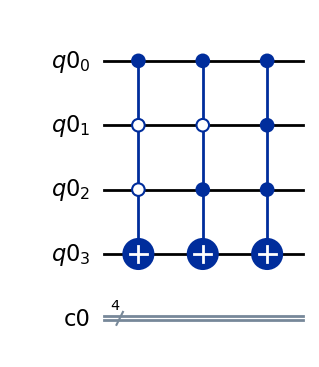

In [2]:
from qiskit import QuantumRegister, QuantumCircuit, ClassicalRegister
from qiskit.circuit.library import MCXGate

qr = QuantumRegister(4)
cr = ClassicalRegister(4)

qc = QuantumCircuit(qr, cr, name='q')

qc.append(MCXGate(3, ctrl_state=1), qr)
qc.append(MCXGate(3, ctrl_state=5), qr)
qc.append(MCXGate(3, ctrl_state=7), qr)

qc.draw(output='mpl')

donde hemos hecho uso de la puerta multicontrolada [MCXGate](https://qiskit.org/documentation/stubs/qiskit.circuit.library.MCXGate.html?highlight=mcxgate#qiskit.circuit.library.MCXGate) de qiskit. 

Para implementar una función digital $f:\{0,1\}^n\to \{0,1\}^m$ lo único que tenemos que hacer es conocer la lista de  salidas. La longitud en bits de las salidas será $m$. El número de salidas será $n$, con lo que, de la tabla podemos deducir todo lo que necesitamos.

Por ejemplo la siguiente *tabla de verdad* se corresponde con una función  $f:\{0,1\}^4\to \{0,1\}^4$, es decir, $n=m=4$

$$
\begin{array}{cc|cc}
\hline x & f(x) & x & f(x) \\ \hline
0000&1111& 1000&0101\\
0001&1011& 1001&0100\\
0010&0011& 1010&0000\\
0011&1000& 1011&1110\\
0100&0101& 1100&1111\\
0101&0100& 1101&1011\\
0110&0000& 1110&0011\\
0111&1110& 1111&1000\\
\hline 
\end{array}
$$


¡Vamos a programar!

In [79]:
def oracle(f_outputs): 
    
    n = int(np.log2(len(f_outputs)))  #dimension del registro de entrada |x> 
    m = len(f_outputs[0])             #dimension del registro de salida |f(x)>
#    print(m)
    #generamos todos los posibles inputs en binario, completando con ceros hasta tener strings de n bits
    inputs = [format(i, 'b').zfill(n) for i in range(2**n)]
#    print(f_outputs[0])
    
    qr_input = QuantumRegister(n, name='input')
    qr_output = QuantumRegister(m, name='output')
    qc = QuantumCircuit(qr_input, qr_output)

    # Hacemos un bucle sobre los inputs
    for i,input_str in enumerate(inputs):
        ctrl_state= int(input_str[::],2)
        # Para cada input, i, haz un bucle sobre cada bit del output     
        for j,output_bit in enumerate(f_outputs[i]):
#            print(j,output)
            if output_bit =='1':
                qc.append(MCXGate(len(input_str), ctrl_state=ctrl_state),qr_input[:]+[qr_output[m-j-1]])  

    return qc

La función se especifica mediante una lista de *strings* binarios

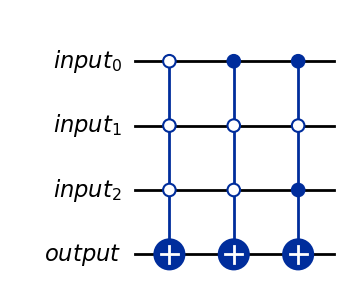

In [83]:
 f_out_1 = ['1111', '1011', '0011', '1000', '0101', '0100', 
               '0000', '1110', '0101', '0100', '0000', '1110', 
               '1111', '1011', '0011', '1000']

f_out_2= ['000', '001', '010', '011', '100', '101', '110', '111']
    
f_out_3= ['1', '1', '0', '0', '0', '1', '0', '0']


oracle(f_out_3).draw('mpl')

Evaluemos este circuito 

['000', '001', '010', '011', '100', '101', '110', '111']


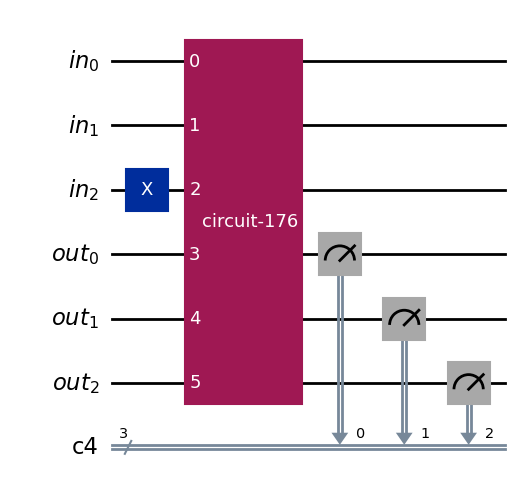

In [14]:
n=3
qr_in = QuantumRegister(n, name='in')
qr_out = QuantumRegister(n, name='out')
cr = ClassicalRegister(n)
qc = QuantumCircuit(qr_in,qr_out,cr)


qc.x(2)
qc.append(oracle(f_out_2).to_gate(),qr_in[:]+qr_out[:])
qc.measure(qr_out,cr)

qc.draw('mpl')

In [15]:
from qiskit.primitives import Sampler

counts = Sampler().run(qc,shots=1).result().quasi_dists[0]

for keys,values in counts.items():
    print("{0:b}".format(keys),values)

100 1.0


::::::{admonition} Ejercicio
:class: tip

       
Escribe una función <i>balanced_binary(n)</i> para $f:S^n\to S$  tal que $f(x) = \pm 1$ aleatoriamente y de forma <i>equilibrada</i> (es decir, tantos $f(x)= +1$ como $f(x)= -1$). 
::::::


<details>
<summary><p style="text-align: right ;color: navy"> >> Solución </p></summary>

```     
    def balanced_binary(n):
        n_elementos = int(2**n)
        valores = np.array([str(0) for _ in range(int(n_elementos/2))] + [str(1) for _ in range(int(n_elementos/2))])
        np.random.shuffle(valores)
        f_outputs = np.array([str(i) for i in valores])
        return oracle(f_outputs)
```        
:::


Evidentemente la complejidad de este método para codificar una función binaria no escala bien porque exige una puerta condicionada por cada min-término. En general este número crecerá como una fracción del número de posibles entradas $2^n$. 

Para alguna función concreta, es posible que el circuito requiera  un número de puertas que sólo sea proporcional a $n$. Vamos a ver un caso así en el siguiente ejemplo

### Funcion binaria lineal: 

Dados dos n-tuplas binarias $x=(x_{n-1},\ldots,x_0)$ y $a=(a_{n-1},\ldots,a_0)$ definimos la **función lineal**

        
\begin{equation*}
f(x;a) = a \cdot x = a_{n-1} x_{n-1} \oplus a_{n-2} x_{n-2} \oplus \cdots \oplus a_{0} x_{0}\; ,
\end{equation*}


donde  $\oplus$ es la *suma módulo 2*, por lo que el resultado sólo puede ser 0 ó 1. 

El circuito que implementa esta función sólo requiere una puerta $\hbox{CNOT}$ por cada valor de $a_i=1$. Por ejemplo, tomemos $a=01011$ 



::::{figure} images/linear_function.png
:width: 350px
:align: center
::::


In [93]:
def linear_circuit(x,a):
       
    assert(len(x)==len(a))

    # Inicialización de los registros
    qr_in = QuantumRegister(len(a), name='qr_in')
    qr_out = QuantumRegister(1, name='qr_out')
    cr = ClassicalRegister(1, name='cr')  
    qc = QuantumCircuit(qr_in, qr_out, cr, name='q_linear')
    
    'inicializamo el estado x '
    for i, xq in enumerate(reversed(x)):  # ojo con la ordenación de qiskit, por eso está reversed()
        if xq == '1':
             qc.x(qr_in[i]) 

    qc.barrier()

    'codificamos la función lineal x.a '
    for i, aq in enumerate(reversed(a)):
        if aq == '1':
             qc.cx(qr_in[i],qr_out) 
            
    qc.barrier()
    qc.measure(qr_out[0],cr[0])
    
    return qc 

Veamos un ejemplo

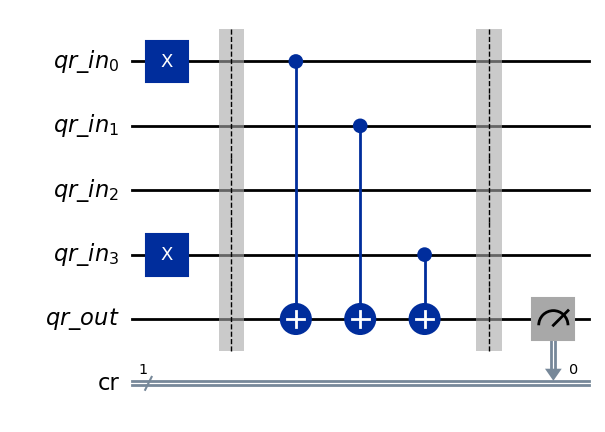

In [94]:
a = '1011'
x = '1001'

qc=linear_circuit(x,a)
qc.draw('mpl')

La función $a\cdot x = (1 + 0 + 0 + 1)mod(2) = 0$. Vamos a ver si este resultado es el hallado

In [95]:
n_tiradas = 1

counts = Sampler().run(qc,shots=1).result().quasi_dists[0]

print(counts)

{0: 1.0}


::::::{admonition} Ejercicio
:class: tip

sea la función $f(x) = x^2$, evaluadad sobre el conjunto de valores $x\in \{0,1,2,3\}$ . Halla la tabla de verdad en binario y construye el oráculo que implementa esta función.    
::::::
